In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
unemp = pd.read_csv("UnemploymentReport.csv")
unemp.head(10)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,Unemployment Rate (percent),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,FIPS,Name,2014,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,Median Household Income (2021),NaN,% of State Median HH Income
2,NaN,34000,New Jersey,6.7,5.7,4.9,4.5,4.0,3.5,9.4,6.7,3.9,"$89,227",NaN,100.0%
3,NaN,34001,"Atlantic County, NJ",10.5,9.5,7.4,7.1,5.7,4.9,17.1,9.9,5.4,"$65,693",NaN,73.6%
4,NaN,34003,"Bergen County, NJ",5.4,4.6,4.1,3.8,3.3,2.8,9.2,6.3,3.5,"$104,777",NaN,117.4%
5,NaN,34005,"Burlington County, NJ",6.4,5.3,4.4,4.0,3.6,3.2,7.9,5.7,3.5,"$94,043",NaN,105.4%
6,NaN,34007,"Camden County, NJ",7.7,6.4,5.5,5.0,4.5,4.0,9.7,7.1,4.2,"$77,675",NaN,87.1%
7,NaN,34009,"Cape May County, NJ",12.2,11.0,9.8,9.1,8.2,7.0,13.7,9.3,6.8,"$74,896",NaN,83.9%
8,NaN,34011,"Cumberland County, NJ",9.9,8.7,7.4,6.8,6.3,5.3,10.4,8.1,5.3,"$58,030",NaN,65.0%
9,NaN,34013,"Essex County, NJ",8.0,6.8,6.0,5.5,5.0,4.3,11.2,8.3,4.7,"$66,191",NaN,74.2%


In [3]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   23 non-null     object 
 2   Unnamed: 2   23 non-null     object 
 3   Unnamed: 3   24 non-null     object 
 4   Unnamed: 4   23 non-null     float64
 5   Unnamed: 5   23 non-null     float64
 6   Unnamed: 6   23 non-null     float64
 7   Unnamed: 7   23 non-null     float64
 8   Unnamed: 8   23 non-null     float64
 9   Unnamed: 9   23 non-null     float64
 10  Unnamed: 10  23 non-null     float64
 11  Unnamed: 11  23 non-null     float64
 12  Unnamed: 12  23 non-null     object 
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  23 non-null     object 
dtypes: float64(10), object(5)
memory usage: 3.3+ KB


In [4]:

#Skip the first row(0) and select all the rows from the second row(1) remove duplicate headers basically reset the index 
#unemp.iloc[1:] I use slicing to get row  it start from second row(1) include all the rows  exclude first row(0).
#reset_index(drop=True) reset the index and remove old  index.

unemp_cleandata = unemp.iloc[1:].reset_index(drop=True)


# start header form the frist row
#set column headers from the first row from the data frame
unemp_cleandata.columns = unemp_cleandata.iloc[0]   

#drop the row  for headers and reset index again
unemp_cleandata = unemp_cleandata[1:].reset_index(drop=True)
unemp_cleandata.head()

,NaN,FIPS,Name,2014,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,Median Household Income (2021),NaN,% of State Median HH Income
0,NaN,34000,New Jersey,6.7,5.7,4.9,4.5,4.0,3.5,9.4,6.7,3.9,"$89,227",NaN,100.0%
1,NaN,34001,"Atlantic County, NJ",10.5,9.5,7.4,7.1,5.7,4.9,17.1,9.9,5.4,"$65,693",NaN,73.6%
2,NaN,34003,"Bergen County, NJ",5.4,4.6,4.1,3.8,3.3,2.8,9.2,6.3,3.5,"$104,777",NaN,117.4%
3,NaN,34005,"Burlington County, NJ",6.4,5.3,4.4,4.0,3.6,3.2,7.9,5.7,3.5,"$94,043",NaN,105.4%
4,NaN,34007,"Camden County, NJ",7.7,6.4,5.5,5.0,4.5,4.0,9.7,7.1,4.2,"$77,675",NaN,87.1%


In [5]:
#drop the columns with NAN value
# use dropna  to remove missing data(NaN) from data frame
#how="all" used to drop only those columns where all value are NaN
# Axis 1 means columns 

unemp_cleandata = unemp_cleandata.dropna(how="all", axis=1)
#Rename the columns 
unemp_cleandata.columns = [
    "FIPS", "Name", "2014", "2015", "2016", "2017", "2018", "2019", "2020", 
    "2021", "2022", "Median_Household_Income_2021", "State_Median_Percentage"]
unemp_cleandata.head()

,FIPS,Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,Median_Household_Income_2021,State_Median_Percentage
0,34000,New Jersey,6.7,5.7,4.9,4.5,4.0,3.5,9.4,6.7,3.9,"$89,227",100.0%
1,34001,"Atlantic County, NJ",10.5,9.5,7.4,7.1,5.7,4.9,17.1,9.9,5.4,"$65,693",73.6%
2,34003,"Bergen County, NJ",5.4,4.6,4.1,3.8,3.3,2.8,9.2,6.3,3.5,"$104,777",117.4%
3,34005,"Burlington County, NJ",6.4,5.3,4.4,4.0,3.6,3.2,7.9,5.7,3.5,"$94,043",105.4%
4,34007,"Camden County, NJ",7.7,6.4,5.5,5.0,4.5,4.0,9.7,7.1,4.2,"$77,675",87.1%


In [6]:
#Fiter rows by condition
#unemp_cleandata[unemp_cleandata["Name"] access the column name 
# create boolean to check return true for rows where the value in the name 
#column is not equal to New jersey other wise false. Apply the condition when ["Name"] != "New Jersey"] is true

unemp_cleandata = unemp_cleandata[unemp_cleandata["Name"] != "New Jersey"]

#Reset the index 
#drop=True drop the old index
#inplace = True update the dataframe don't create new one 
unemp_cleandata.reset_index(drop=True, inplace = True)


In [7]:
unemp_cleandata.head()

,FIPS,Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,Median_Household_Income_2021,State_Median_Percentage
0,34001,"Atlantic County, NJ",10.5,9.5,7.4,7.1,5.7,4.9,17.1,9.9,5.4,"$65,693",73.6%
1,34003,"Bergen County, NJ",5.4,4.6,4.1,3.8,3.3,2.8,9.2,6.3,3.5,"$104,777",117.4%
2,34005,"Burlington County, NJ",6.4,5.3,4.4,4.0,3.6,3.2,7.9,5.7,3.5,"$94,043",105.4%
3,34007,"Camden County, NJ",7.7,6.4,5.5,5.0,4.5,4.0,9.7,7.1,4.2,"$77,675",87.1%
4,34009,"Cape May County, NJ",12.2,11.0,9.8,9.1,8.2,7.0,13.7,9.3,6.8,"$74,896",83.9%


In [8]:
# I choose specific column to make numeric not entire data frame. 

#convert all column from object to float
#apply(pd.to_numeric) means convert all the column to numeric 
#errors="coerce" if there any non-numeric value replaced with NaN instead causing error

numeric_columns = [
    "2014", "2015", "2016", "2017", "2018", "2019", "2020", 
    "2021", "2022"]
unemp_cleandata[numeric_columns] = unemp_cleandata[numeric_columns].apply(pd.to_numeric, errors="coerce")
unemp_cleandata.head()
unemp_cleandata.dtypes

FIPS                             object
Name                             object
2014                            float64
2015                            float64
2016                            float64
2017                            float64
2018                            float64
2019                            float64
2020                            float64
2021                            float64
2022                            float64
Median_Household_Income_2021     object
State_Median_Percentage          object
dtype: object

In [9]:
#provides summary statistics of numeric columns unemployment data
unemp_cleandata.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,7.161905,6.133333,5.276190,4.866667,4.300000,3.738095,9.595238,6.819048,4.080952
std,1.897229,1.770122,1.482196,1.405821,1.253794,1.050465,2.381696,1.381528,0.927156
min,4.800000,4.200000,3.700000,3.500000,3.100000,2.700000,6.900000,4.900000,3.000000
25%,6.100000,5.100000,4.400000,4.000000,3.500000,3.100000,8.200000,5.900000,3.500000
50%,6.400000,5.400000,4.700000,4.300000,3.800000,3.300000,9.100000,6.300000,3.800000
75%,8.000000,6.800000,6.000000,5.500000,4.900000,4.200000,10.200000,7.700000,4.700000
max,12.200000,11.000000,9.800000,9.100000,8.200000,7.000000,17.100000,9.900000,6.800000


In [10]:
# Define a list of years as strings. These represent the column names in the dataset for the unemployment data.
years=[ "2014", "2015", "2016", "2017", "2018", "2019", "2020","2021", "2022"]
# Calculate the mean of the columns corresponding to the specified years in the unemployment dataset.
# numeric_only=True ensures that only numeric data in these columns is considered for the mean calculation.
yearly_means = unemp_cleandata[years].mean(numeric_only=True)
# Display the calculated yearly mean values.
yearly_means

2014    7.161905
2015    6.133333
2016    5.276190
2017    4.866667
2018    4.300000
2019    3.738095
2020    9.595238
2021    6.819048
2022    4.080952
dtype: float64

In [11]:
# Calculate the median of the columns corresponding to the specified years in the unemployment dataset.
# numeric_only=True ensures that only numeric data in these columns is considered for the median calculation.
yearly_median = unemp_cleandata[years].median(numeric_only=True)
# Display the calculated yearly median values.
yearly_median

2014    6.4
2015    5.4
2016    4.7
2017    4.3
2018    3.8
2019    3.3
2020    9.1
2021    6.3
2022    3.8
dtype: float64

In [12]:
# Calculate the max of the columns corresponding to the specified years in the unemployment dataset.
# numeric_only=True ensures that only numeric data in these columns is considered for the max calculation.
yearly_max = unemp_cleandata[years].max(numeric_only=True)
# Display the calculated yearly max values.
yearly_max

2014    12.2
2015    11.0
2016     9.8
2017     9.1
2018     8.2
2019     7.0
2020    17.1
2021     9.9
2022     6.8
dtype: float64

In [13]:
#returns the index of the row with the highest value in the "2020" column.
unemp_cleandata.loc[unemp_cleandata["2020"].idxmax()]


FIPS                                          34001
Name                            Atlantic County, NJ
2014                                           10.5
2015                                            9.5
2016                                            7.4
2017                                            7.1
2018                                            5.7
2019                                            4.9
2020                                           17.1
2021                                            9.9
2022                                            5.4
Median_Household_Income_2021                $65,693
State_Median_Percentage                       73.6%
Name: 0, dtype: object

In [14]:
#returns the index of the row with the lowest value in the "2020" column.
unemp_cleandata.loc[unemp_cleandata["2020"].idxmin()]

FIPS                                           34019
Name                            Hunterdon County, NJ
2014                                             4.8
2015                                             4.2
2016                                             3.7
2017                                             3.5
2018                                             3.1
2019                                             2.7
2020                                             6.9
2021                                             4.9
2022                                             3.0
Median_Household_Income_2021                $122,095
State_Median_Percentage                       136.8%
Name: 9, dtype: object

In [15]:
#Calculate the average Unemployment for each country from 2014 to 2022 and add it as a new column called Avg_Unemployment. 
unemp_cleandata['Avg_Unemployment'] = unemp_cleandata[["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]].mean(axis=1)
#Display the first 21 rows of the updated dataset 
unemp_cleandata.head(21)

,FIPS,Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,Median_Household_Income_2021,State_Median_Percentage,Avg_Unemployment
0,34001,"Atlantic County, NJ",10.5,9.5,7.4,7.1,5.7,4.9,17.1,9.9,5.4,"$65,693",73.6%,8.611111
1,34003,"Bergen County, NJ",5.4,4.6,4.1,3.8,3.3,2.8,9.2,6.3,3.5,"$104,777",117.4%,4.777778
2,34005,"Burlington County, NJ",6.4,5.3,4.4,4.0,3.6,3.2,7.9,5.7,3.5,"$94,043",105.4%,4.888889
3,34007,"Camden County, NJ",7.7,6.4,5.5,5.0,4.5,4.0,9.7,7.1,4.2,"$77,675",87.1%,6.011111
4,34009,"Cape May County, NJ",12.2,11.0,9.8,9.1,8.2,7.0,13.7,9.3,6.8,"$74,896",83.9%,9.677778
5,34011,"Cumberland County, NJ",9.9,8.7,7.4,6.8,6.3,5.3,10.4,8.1,5.3,"$58,030",65.0%,7.577778
6,34013,"Essex County, NJ",8.0,6.8,6.0,5.5,5.0,4.3,11.2,8.3,4.7,"$66,191",74.2%,6.644444
7,34015,"Gloucester County, NJ",7.3,6.0,5.0,4.6,4.1,3.6,8.9,6.4,3.8,"$93,783",105.1%,5.522222
8,34017,"Hudson County, NJ",6.3,5.3,4.6,4.3,3.7,3.2,10.2,7.1,3.8,"$79,159",88.7%,5.388889
9,34019,"Hunterdon County, NJ",4.8,4.2,3.7,3.5,3.1,2.7,6.9,4.9,3.0,"$122,095",136.8%,4.088889


In [16]:
# Find the county that had the highest average unemployment rates from 2014 to 2022
highest_avg_unemployment = unemp_cleandata.loc[unemp_cleandata['Avg_Unemployment'].idxmax()]
highest_avg_unemployment


FIPS                                          34009
Name                            Cape May County, NJ
2014                                           12.2
2015                                           11.0
2016                                            9.8
2017                                            9.1
2018                                            8.2
2019                                            7.0
2020                                           13.7
2021                                            9.3
2022                                            6.8
Median_Household_Income_2021                $74,896
State_Median_Percentage                       83.9%
Avg_Unemployment                           9.677778
Name: 4, dtype: object

In [17]:
# Find the county that had lowest average unemployment rates from 2014 to 2022
lowest_avg_unemployment = unemp_cleandata.loc[unemp_cleandata['Avg_Unemployment'].idxmin()]
lowest_avg_unemployment

FIPS                                           34019
Name                            Hunterdon County, NJ
2014                                             4.8
2015                                             4.2
2016                                             3.7
2017                                             3.5
2018                                             3.1
2019                                             2.7
2020                                             6.9
2021                                             4.9
2022                                             3.0
Median_Household_Income_2021                $122,095
State_Median_Percentage                       136.8%
Avg_Unemployment                            4.088889
Name: 9, dtype: object

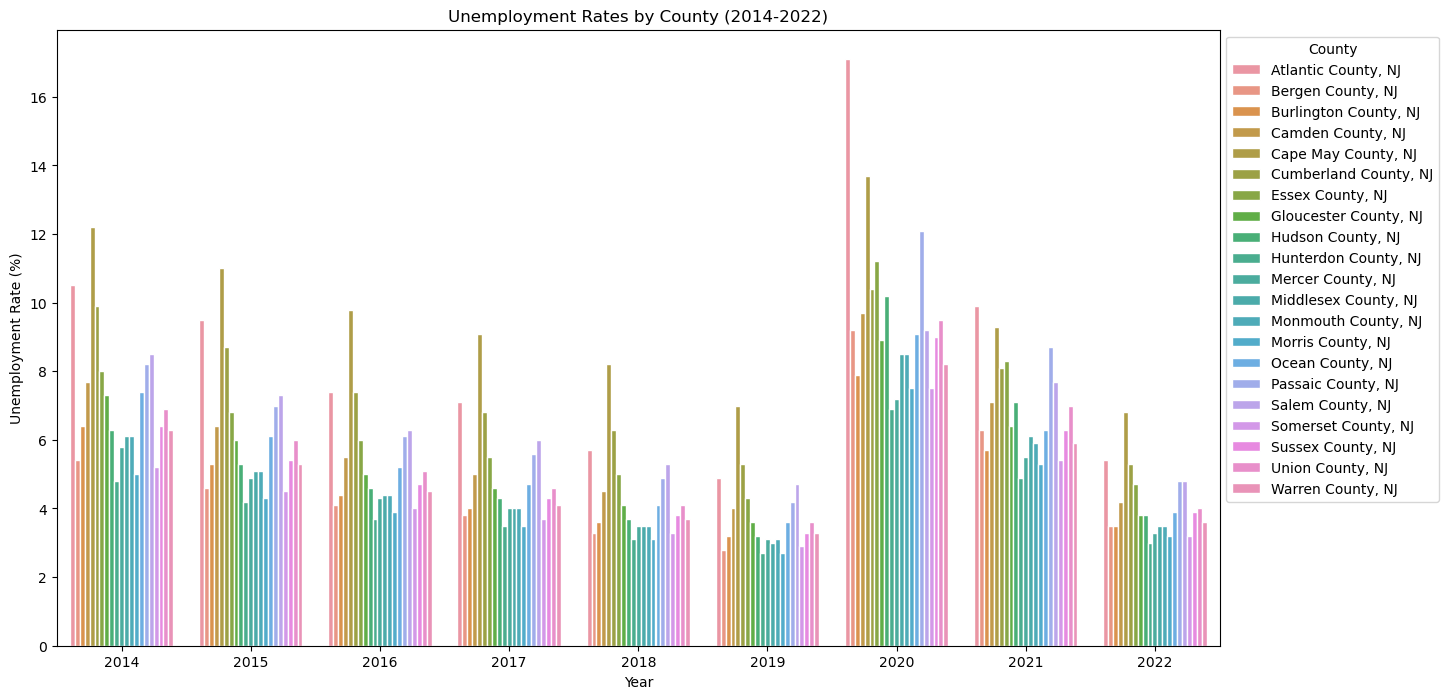

In [18]:
#grouped bar to visualize each county's unemployment rate
plt.figure(figsize=(15, 8))

# Melt the dataset to long
unemp_long = unemp_cleandata.melt(id_vars=["Name"], value_vars=["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"], var_name="Year", 
                                  value_name="Unemployment_Rate")

# Converting year to integer
unemp_long["Year"] = unemp_long["Year"].astype(int)

# bar plot
sns.barplot(data=unemp_long, x="Year", y="Unemployment_Rate", hue="Name", edgecolor='white')

plt.title("Unemployment Rates by County (2014-2022)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")

# legend display
plt.legend(title="County", bbox_to_anchor=(1, 1))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Hunterdon County, NJ'),
  Text(1, 0, 'Morris County, NJ'),
  Text(2, 0, 'Somerset County, NJ'),
  Text(3, 0, 'Mercer County, NJ'),
  Text(4, 0, 'Bergen County, NJ'),
  Text(5, 0, 'Burlington County, NJ'),
  Text(6, 0, 'Monmouth County, NJ'),
  Text(7, 0, 'Middlesex County, NJ'),
  Text(8, 0, 'Warren County, NJ'),
  Text(9, 0, 'Sussex County, NJ'),
  Text(10, 0, 'Hudson County, NJ'),
  Text(11, 0, 'Gloucester County, NJ'),
  Text(12, 0, 'Ocean County, NJ'),
  Text(13, 0, 'Union County, NJ'),
  Text(14, 0, 'Camden County, NJ'),
  Text(15, 0, 'Salem County, NJ'),
  Text(16, 0, 'Essex County, NJ'),
  Text(17, 0, 'Passaic County, NJ'),
  Text(18, 0, 'Cumberland County, NJ'),
  Text(19, 0, 'Atlantic County, NJ'),
  Text(20, 0, 'Cape May County, NJ')])

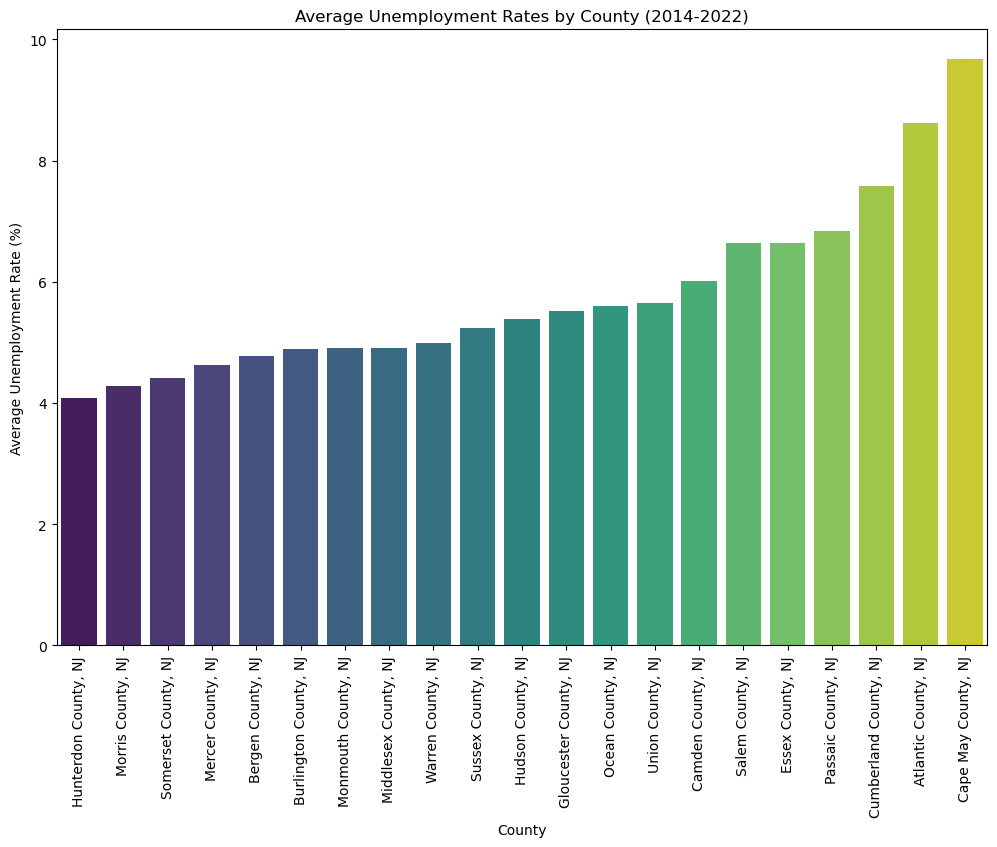

In [19]:
#barchart to visualize the average unemployment rate of each counties in NJ
plt.figure(figsize=(12, 8))

# Sort the data by average unemployment rate
sorted_data = unemp_cleandata.sort_values(by="Avg_Unemployment")

# bar chart
sns.barplot(data=sorted_data, x="Name", y="Avg_Unemployment", palette="viridis")

plt.title("Average Unemployment Rates by County (2014-2022)")
plt.xlabel("County")
plt.ylabel("Average Unemployment Rate (%)")

# Rotate x-axis label
plt.xticks(rotation=90)

Text(0, 0.5, 'Average Unemployment Rate (%)')

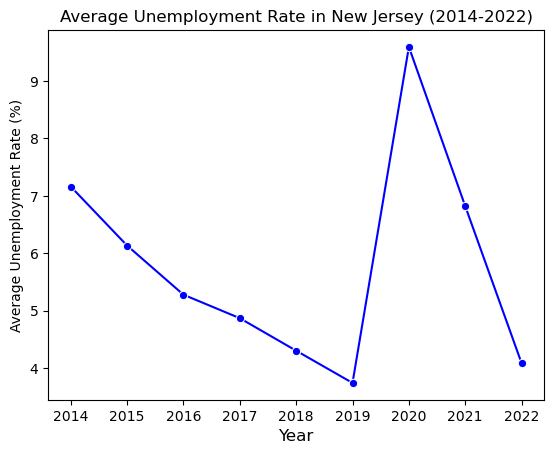

In [20]:
# time series lineplot for average unemployment rate in new jersey
sns.lineplot(x=yearly_means.index, y=yearly_means.values, marker="o", color="blue")

plt.title("Average Unemployment Rate in New Jersey (2014-2022)")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Unemployment Rate (%)")